In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('nutrition_prepro1.csv')
df

,FDC_ID,Item,Category,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
0,167516,"Waffles, buttermilk, frozen, ready-to-heat",Baked Products,273.0,6.58,41.05,9.22,15.0,2.2,40.34,0.0,0.0
1,167517,"Waffle, buttermilk, frozen, ready-to-heat, toa...",Baked Products,309.0,7.42,48.39,9.49,13.0,2.6,31.57,0.0,0.0
2,167520,"Pie Crust, Cookie-type, Graham Cracker, Ready ...",Baked Products,501.0,5.10,64.30,24.83,0.0,1.9,4.37,0.0,0.0
3,167521,"Pie Crust, Cookie-type, Chocolate, Ready Crust",Baked Products,484.0,6.08,64.48,22.42,0.0,2.7,4.99,0.0,0.0
4,167522,"Pie, Dutch Apple, Commercially Prepared",Baked Products,290.0,2.17,44.54,11.50,0.0,1.6,41.09,0.0,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...
5326,175291,"Veal, ground, cooked, broiled","Lamb, Veal, and Game Products",172.0,24.38,0.00,7.56,103.0,0.0,66.76,0.0,0.0
5327,175293,"Bison, ground, grass-fed, raw","Lamb, Veal, and Game Products",146.0,20.23,0.05,7.21,55.0,0.0,71.59,0.0,0.0
5328,175295,"Game meat, beaver, cooked, roasted","Lamb, Veal, and Game Products",212.0,34.85,0.00,6.96,117.0,0.0,57.92,0.0,3.0
5329,175298,"Game meat, boar, wild, cooked, roasted","Lamb, Veal, and Game Products",160.0,28.30,0.00,4.38,77.0,0.0,63.87,0.0,0.0


In [5]:
df['Item'].value_counts()

Waffles, buttermilk, frozen, ready-to-heat                                             1
Figs, raw                                                                              1
Dates, deglet noor                                                                     1
Currants, zante, dried                                                                 1
Cranberries, dried, sweetened (Includes foods for USDA's Food Distribution Program)    1
                                                                                      ..
Sausage, turkey, fresh, cooked                                                         1
Lebanon bologna, beef                                                                  1
Knackwurst, knockwurst, pork, beef                                                     1
Ham salad spread                                                                       1
Game meat, goat, cooked, roasted                                                       1
Name: Item, Length: 5

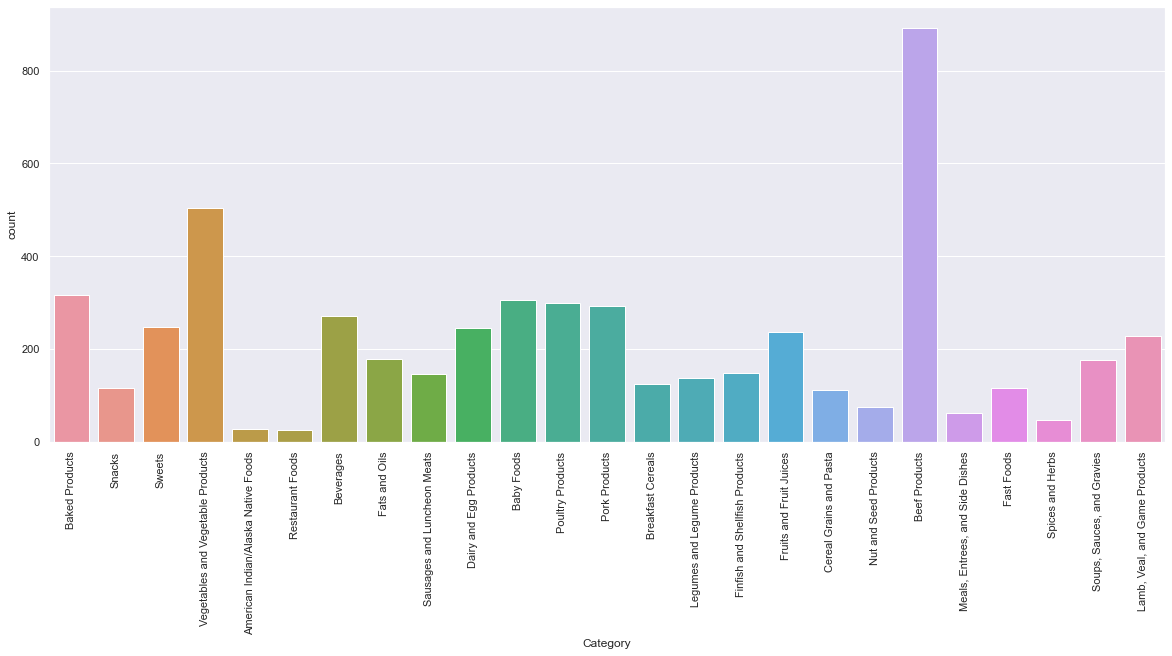

In [9]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'Category', data = df )
plt.xticks(rotation = 90)
plt.show()

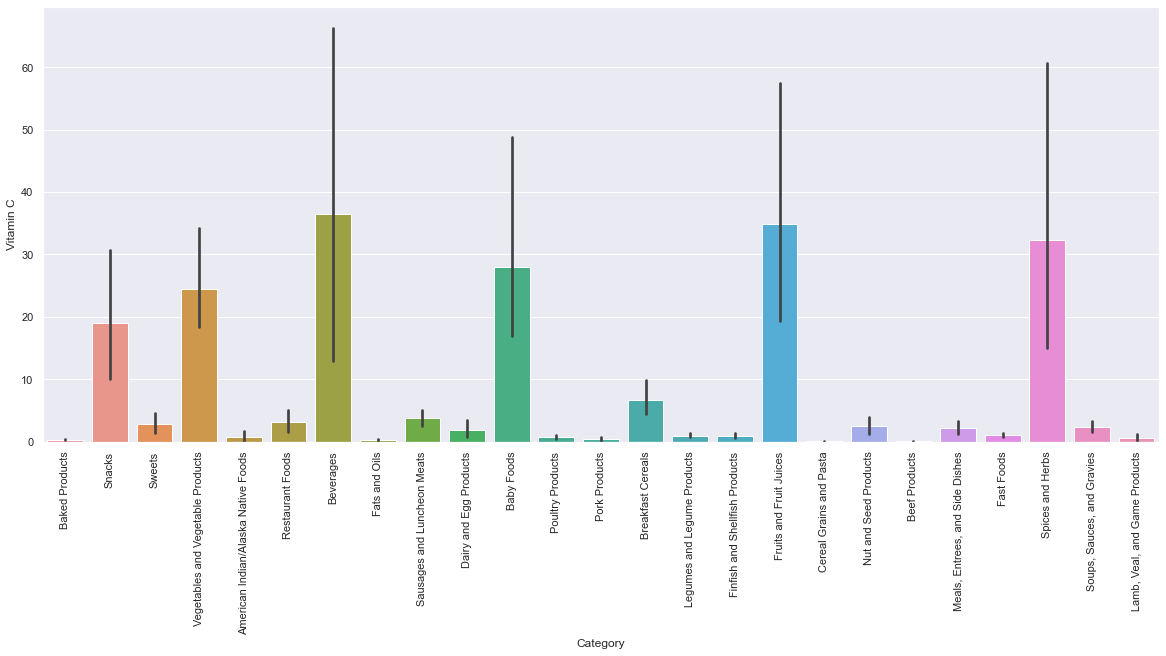

In [10]:
plt.figure(figsize = (20, 8))
sns.barplot(x = 'Category', y = 'Vitamin C', data = df)
plt.xticks(rotation = 90)
plt.show()

Beverages, baby foods, Fruit & Fruit Juices, Spices & Herbs are higher sources of Vitamin C

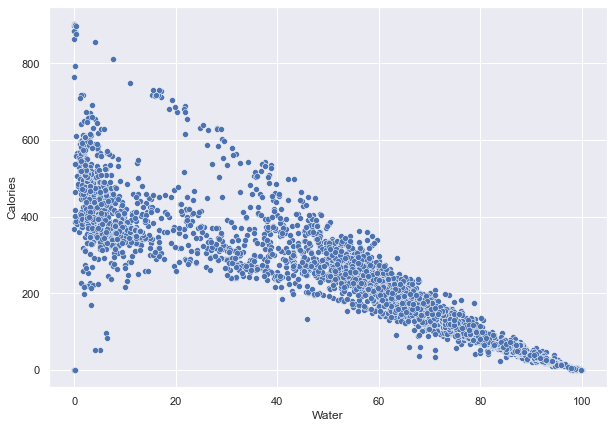

In [15]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'Water', y = 'Calories', data = df)
plt.show()

AS water content increases calories decreases

In [3]:
num_features = df.columns.values[3:]
num_features = list(num_features)
num_features

['Calories',
 'Protein',
 'Carbohydrate',
 'Total fat',
 'Cholesterol',
 'Fiber',
 'Water',
 'Alcohol',
 'Vitamin C']

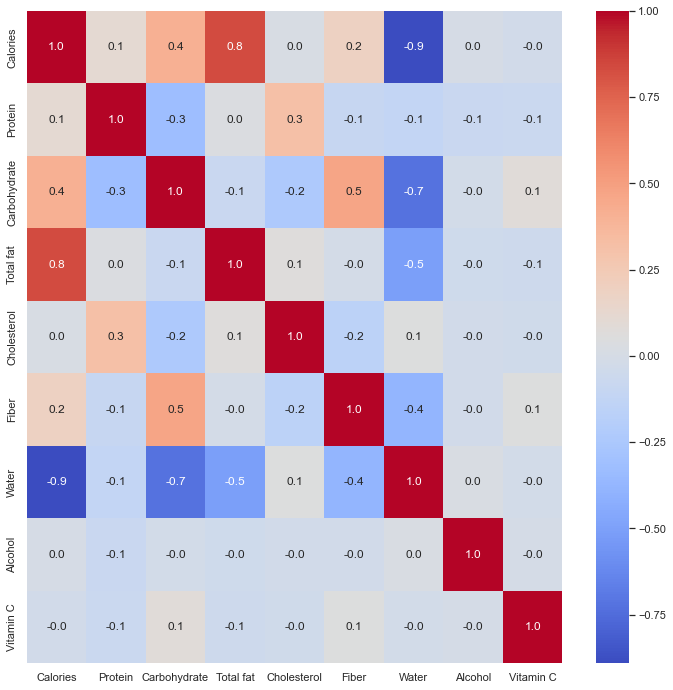

In [24]:
correlation = df[num_features].corr()
plt.figure(figsize = (12, 12))
sns.heatmap(correlation, cmap = 'coolwarm', annot = True, fmt = '.1f')
plt.show()

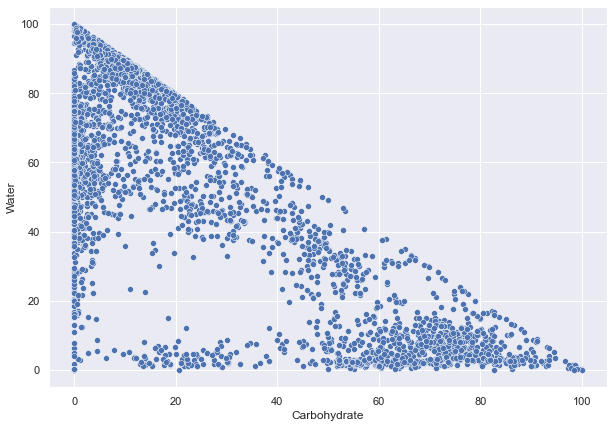

In [25]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'Carbohydrate', y = 'Water', data = df)
plt.show()

Carbohydrate is negatively correlated to water. A zero carb diet will have excess water content which would result in less calories

Protein isn't related to any of the nutritional composition

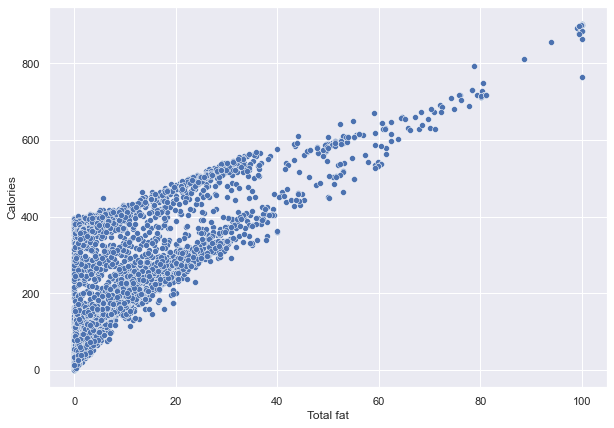

In [27]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = 'Total fat', y = 'Calories', data = df)
plt.show()

As total fat increases, calories increases

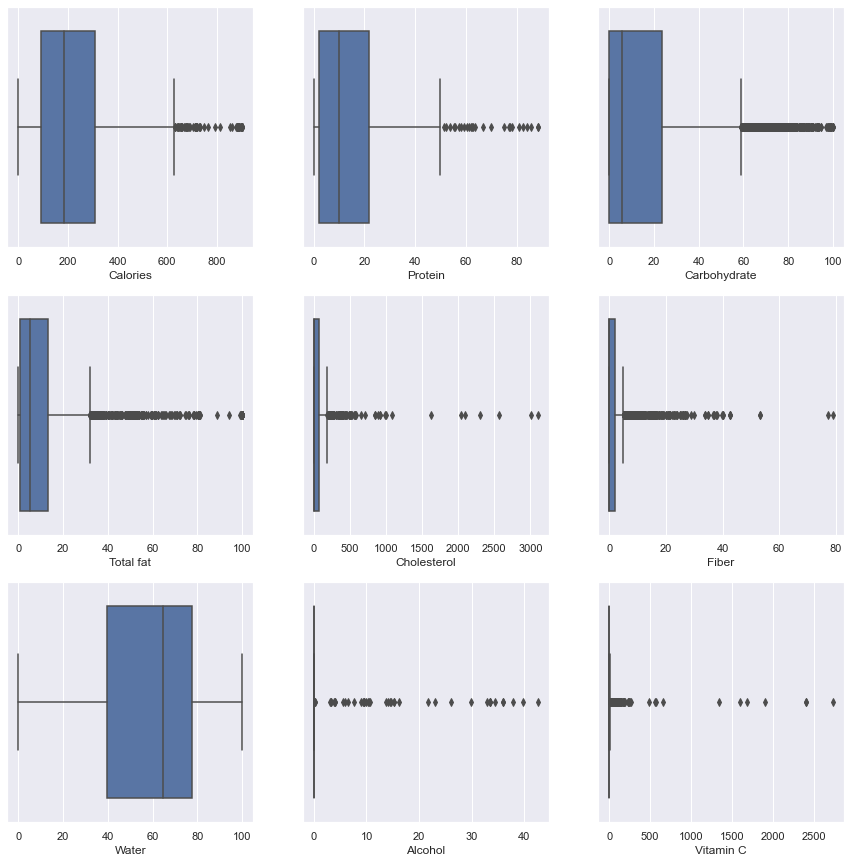

In [6]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

for param, ax in zip(num_features, axes.flatten()):
    sns.boxplot(x = param, data = df, ax= ax)

In [4]:
df[num_features].describe()

,Calories,Protein,Carbohydrate,Total fat,Cholesterol,Fiber,Water,Alcohol,Vitamin C
count,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000
mean,219.152129,12.618464,18.281538,10.829006,43.474958,1.787826,56.526807,0.131307,8.855843
std,169.279155,11.272516,25.608367,16.695132,109.929714,4.197430,29.305545,1.845521,78.134016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,92.000000,2.110000,0.000000,0.900000,0.000000,0.000000,39.540000,0.000000,0.000000
50%,182.000000,10.100000,5.860000,5.320000,8.000000,0.000000,64.620000,0.000000,0.000000
75%,307.000000,21.765000,23.525000,13.370000,72.000000,2.000000,77.755000,0.000000,2.300000
max,902.000000,88.320000,100.000000,100.000000,3100.000000,79.000000,99.980000,42.500000,2732.000000
